In [1]:
# libraries

import pandas as pd
import glob
import datetime as datetime
from datetime import timedelta
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

# color pallete
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [2]:
# Get a list of all csv files in a directory
csv_files = glob.glob('dados/*.csv')

# Create a empty dataframe to store the combined data
df = pd.DataFrame()

# Loop through each csv file and append its contents to the combined dataframe
for file in csv_files:
    dados = pd.read_csv(file)
    df = pd.concat([df, dados])

## Data Wrangling

In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [4]:
df = df.rename(columns={'rideable_type': 'bike_type',
                        'member_casual': 'user_type'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5719877 entries, 0 to 224072
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   bike_type           object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  user_type           object 
dtypes: float64(4), object(9)
memory usage: 610.9+ MB


In [6]:
df = df.sort_values('started_at')

In [7]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])



In [8]:
df['ride_length'] = round((df.ended_at -  df.started_at)/datetime.timedelta(minutes=1))

In [9]:
df['month'] = df.started_at.dt.month_name()
df['day_of_week'] = df.started_at.dt.day_name()
df['quarter'] = df.started_at.dt.quarter

In [10]:

def haversine(lat1, lon1, lat2, lon2):
    # Converte graus para radianos
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Diferenças das coordenadas
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Fórmula Haversine
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371  # Raio da Terra em quilômetros
    return c * r

In [11]:
df['ride_km'] = df.apply(lambda x: haversine(x['start_lat'], x['start_lng'], x['end_lat'], x['end_lng']), axis=1)

In [12]:
df.head()

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,month,day_of_week,quarter,ride_km
80659,53F0F248F28485D2,electric_bike,2023-01-01 00:01:58,2023-01-01 00:02:41,NaN,NaN,NaN,NaN,41.800000,-87.590000,41.800000,-87.590000,casual,1.0,January,Sunday,1,0.000000
189816,D8EEE72183269F07,classic_bike,2023-01-01 00:02:06,2023-01-01 00:29:46,Fairbanks Ct & Grand Ave,TA1305000003,New St & Illinois St,TA1306000013,41.891847,-87.620580,41.890847,-87.618617,member,28.0,January,Sunday,1,0.196938
185198,E5AD797A579842F8,electric_bike,2023-01-01 00:03:26,2023-01-01 00:07:23,Sheridan Rd & Loyola Ave,RP-009,Sheridan Rd & Loyola Ave,RP-009,42.001139,-87.661256,42.001044,-87.661198,casual,4.0,January,Sunday,1,0.011641
106410,8FBD2AD70B0F6A6F,classic_bike,2023-01-01 00:04:07,2023-01-01 00:13:56,Leavitt St & Lawrence Ave,TA1309000015,Broadway & Argyle St,13108,41.968885,-87.684001,41.973815,-87.659660,casual,10.0,January,Sunday,1,2.085631
169407,B05BD052B9EBB767,electric_bike,2023-01-01 00:04:27,2023-01-01 00:16:52,Clark St & Montrose Ave,KA1503000022,Clark St & Montrose Ave,KA1503000022,41.961545,-87.666189,41.961588,-87.666036,member,12.0,January,Sunday,1,0.013570


## EDA

In [13]:
df.describe(include='all')

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,month,day_of_week,quarter,ride_km
count,5719877,5719877,5719877,5719877,4844161,4844029,4790675,4790534,5.719877e+06,5.719877e+06,5.712887e+06,5.712887e+06,5719877,5.719877e+06,5719877,5719877,5.719877e+06,5.712887e+06
unique,5719877,3,NaN,NaN,1592,1516,1597,1520,NaN,NaN,NaN,NaN,2,NaN,12,7,NaN,NaN
top,53F0F248F28485D2,electric_bike,NaN,NaN,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,NaN,NaN,NaN,NaN,member,NaN,August,Saturday,NaN,NaN
freq,1,2945579,NaN,NaN,63249,63249,64197,64197,NaN,NaN,NaN,NaN,3660698,NaN,771693,883566,NaN,NaN
mean,NaN,NaN,2023-07-16 10:27:50.017874176,2023-07-16 10:46:00.177125376,NaN,NaN,NaN,NaN,4.190288e+01,-8.764704e+01,4.190322e+01,-8.764720e+01,NaN,1.816750e+01,NaN,NaN,2.666745e+00,2.102585e+00
min,NaN,NaN,2023-01-01 00:01:58,2023-01-01 00:02:41,NaN,NaN,NaN,NaN,4.163000e+01,-8.794000e+01,0.000000e+00,-8.816000e+01,NaN,-1.665700e+04,NaN,NaN,1.000000e+00,0.000000e+00
25%,NaN,NaN,2023-05-21 12:50:44,2023-05-21 13:14:09,NaN,NaN,NaN,NaN,4.188096e+01,-8.766000e+01,4.188103e+01,-8.766027e+01,NaN,5.000000e+00,NaN,NaN,2.000000e+00,8.621367e-01
50%,NaN,NaN,2023-07-20 18:02:50,2023-07-20 18:19:47,NaN,NaN,NaN,NaN,4.189902e+01,-8.764403e+01,4.190000e+01,-8.764410e+01,NaN,1.000000e+01,NaN,NaN,3.000000e+00,1.539871e+00
75%,NaN,NaN,2023-09-16 20:08:49,2023-09-16 20:28:10,NaN,NaN,NaN,NaN,4.193000e+01,-8.762991e+01,4.193000e+01,-8.763000e+01,NaN,1.700000e+01,NaN,NaN,3.000000e+00,2.747561e+00
max,NaN,NaN,2023-12-31 23:59:38,2024-01-01 23:50:51,NaN,NaN,NaN,NaN,4.207000e+01,-8.746000e+01,4.218000e+01,0.000000e+00,NaN,9.848900e+04,NaN,NaN,4.000000e+00,9.815429e+03


In [14]:
user = df.user_type.value_counts().reset_index(name='no_of_rides')
user_norm = df.user_type.value_counts(normalize=True).reset_index(name='percentage')
user['percentage (%)'] = user_norm.percentage
user

,user_type,no_of_rides,percentage (%)
0,member,3660698,0.639996
1,casual,2059179,0.360004


In [16]:
top_5_start_station = df.start_station_name.value_counts().reset_index(name='no_of_rides')
top_5_start_station = top_5_start_station.sort_values('no_of_rides', ascending=False).head()
top_5_start_station

,start_station_name,no_of_rides
0,Streeter Dr & Grand Ave,63249
1,DuSable Lake Shore Dr & Monroe St,40288
2,Michigan Ave & Oak St,37383
3,DuSable Lake Shore Dr & North Blvd,35966
4,Clark St & Elm St,35805


In [17]:
top_5_end_station = df.end_station_name.value_counts().reset_index(name='no_of_rides')
top_5_end_station = top_5_end_station.sort_values('no_of_rides', ascending=False).head()
top_5_end_station

,end_station_name,no_of_rides
0,Streeter Dr & Grand Ave,64197
1,DuSable Lake Shore Dr & North Blvd,39301
2,DuSable Lake Shore Dr & Monroe St,38022
3,Michigan Ave & Oak St,37997
4,Clark St & Elm St,34964


In [18]:
# Total users
order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=order, ordered=True)
df.groupby('day_of_week').agg({'ride_length': ['mean', 'max', 'min'],
                               'ride_km': ['mean', 'max', 'min']})

ride_length                     ride_km                  
                   mean      max      min      mean          max  min
day_of_week                                                          
Sunday        22.404146  62867.0 -16657.0  2.162584    36.932792  0.0
Monday        16.989984  83383.0     -6.0  2.037053  9811.343575  0.0
Tuesday       15.921983  64172.0     -5.0  2.073831    25.662415  0.0
Wednesday     15.604385  98489.0 -10626.0  2.067641    30.627320  0.0
Thursday      16.015214  92570.0    -15.0  2.099917  9815.428757  0.0
Friday        17.942398  79775.0    -82.0  2.073803    40.820460  0.0
Saturday      22.395202  64009.0    -50.0  2.196121    30.385396  0.0

In [19]:
# Members
order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=order, ordered=True)
df.loc[df['user_type']=='member'].groupby('day_of_week').agg({'ride_length': ['mean', 'max', 'min'],
                               'ride_km': ['mean', 'max', 'min']})

ride_length                    ride_km                  
                   mean     max      min      mean          max  min
day_of_week                                                         
Sunday        13.903989  1501.0 -16635.0  2.153972    29.424899  0.0
Monday        11.899209  1500.0     -5.0  2.021693    29.555438  0.0
Tuesday       12.011135  1500.0     -3.0  2.086333    25.662415  0.0
Wednesday     11.927393  1500.0 -10476.0  2.083396    25.394429  0.0
Thursday      12.017789  1500.0    -15.0  2.106280  9815.428757  0.0
Friday        12.475635  1500.0    -82.0  2.055913    40.820460  0.0
Saturday      13.935211  1560.0    -22.0  2.178332    29.672580  0.0

In [20]:
# Casual users
order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=order, ordered=True)
df.loc[df['user_type']=='casual'].groupby('day_of_week').agg({'ride_length': ['mean', 'max', 'min'],
                               'ride_km': ['mean', 'max', 'min']})

ride_length                     ride_km                  
                   mean      max      min      mean          max  min
day_of_week                                                          
Sunday        32.756209  62867.0 -16657.0  2.173105    36.932792  0.0
Monday        27.711768  83383.0     -6.0  2.069480  9811.343575  0.0
Tuesday       25.082738  64172.0     -5.0  2.044481    25.239582  0.0
Wednesday     24.258876  98489.0 -10626.0  2.030481    30.627320  0.0
Thursday      24.724517  92570.0     -4.0  2.086021  9810.763392  0.0
Friday        27.259142  79775.0    -60.0  2.104365    27.674655  0.0
Saturday      32.135481  64009.0    -50.0  2.216661    30.385396  0.0

In [37]:
df = df[ (df['ride_km'] < 9000)]

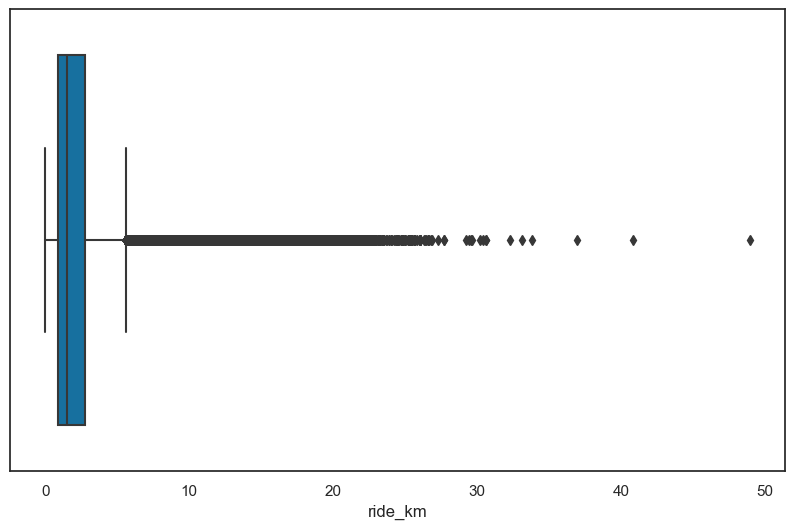

In [38]:
# km
fig, ax = plt.subplots(figsize=(10,6))
sns.set_theme(style='white')

ax = sns.boxplot(data=df, x='ride_km', orient='h', color=AZUL2)


In [28]:
df.ride_km.quantile([0.25,0.5,0.75])

0.25    0.862137
0.50    1.539871
0.75    2.747561
Name: ride_km, dtype: float64

In [29]:
Q1 = df.ride_km.quantile(0.25)
Q3 = df.ride_km.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1-(1.5*IQR)
upper_bound = Q3+(1.5*IQR)
print(f'Lower bound:{lower_bound}\nUpper bound:{upper_bound}')

Lower bound:-1.9659994441806763
Upper bound:5.575697014668769


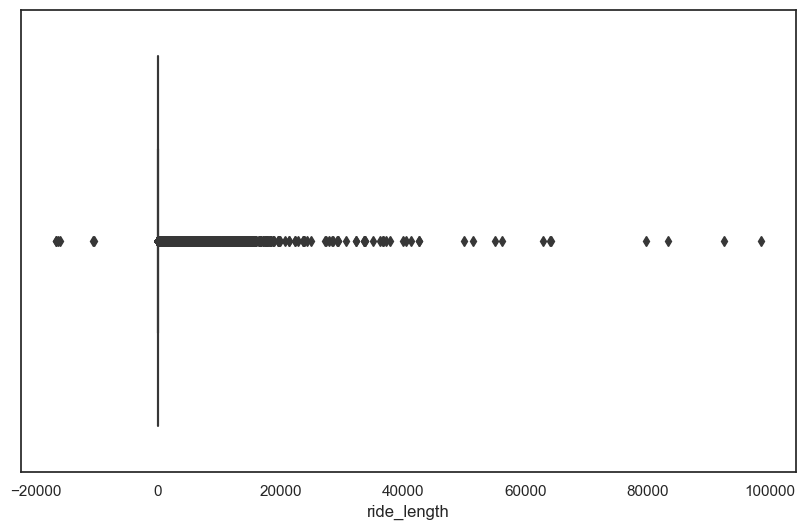

In [34]:
# time
fig, ax = plt.subplots(figsize=(10,6))
sns.set_theme(style='white')

ax = sns.boxplot(data=df, x='ride_length', orient='h', color=AZUL2)

In [35]:
df.ride_length.quantile([0.25,0.5,0.75])

0.25     5.0
0.50    10.0
0.75    17.0
Name: ride_length, dtype: float64

In [36]:
Q1 = df.ride_length.quantile(0.25)
Q3 = df.ride_length.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1-(1.5*IQR)
upper_bound = Q3+(1.5*IQR)
print(f'Lower bound:{lower_bound}\nUpper bound:{upper_bound}')

Lower bound:-13.0
Upper bound:35.0


## Cleaning

In [39]:
# In this analysis, we will only consider trips that are up to one day long and longer than 1 minute.
df = df[(df['ride_length'] >= 1) & (df['ride_length'] < 1440)]

In [40]:
# checking for duplicated values
df.duplicated().sum()

0

In [41]:
# checking the percentage of missing values
(df.isna().sum()/len(df))*100

ride_id                0.000000
bike_type              0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    15.100275
start_station_id      15.102590
end_station_name      15.697960
end_station_id        15.700435
start_lat              0.000000
start_lng              0.000000
end_lat                0.000000
end_lng                0.000000
user_type              0.000000
ride_length            0.000000
month                  0.000000
day_of_week            0.000000
quarter                0.000000
ride_km                0.000000
dtype: float64

In [42]:
# As 'end_lat', 'end_lng' and 'ride_km' has 0.01% missing values, we will delete these entries.
df.dropna(subset=['end_lat', 'end_lng', 'ride_km'], inplace=True)

In [43]:
df = df[(df['ride_km']>0) & (df['ride_km'] < 6)]

## Data Vizualization

In [44]:
# What are the most used types of bikes?

df_bike_type = df.copy()
df_bike_type = df_bike_type.bike_type.value_counts().reset_index() 
df_bike_type = df_bike_type.rename(columns={'count': 'total'})
df_bike_type = df_bike_type.sort_values('total', ascending=True)
df_bike_type 

,bike_type,total
2,docked_bike,56724
1,classic_bike,2425678
0,electric_bike,2633812


In [45]:

def plot_col_style(colors: list=[AZUL2]):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.set_theme(style='white')

    ax = sns.barplot(data=df_bike_type, x=df_bike_type.bike_type, y=df_bike_type.total, palette=colors)

    ax.set_title('Bike sharing by bike type\nin 2023', loc='left', fontsize=18, color=CINZA1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
    sns.despine(left=True, bottom=True)

    ax.set_yticklabels([])
    for i, valor in enumerate(df_bike_type.total):
        qtd = f'{valor:,.0f}'
        offset = 1e5
        ax.text(i, valor+offset, qtd, color=CINZA2, fontsize=12, ha='center', va='center')
    return ax



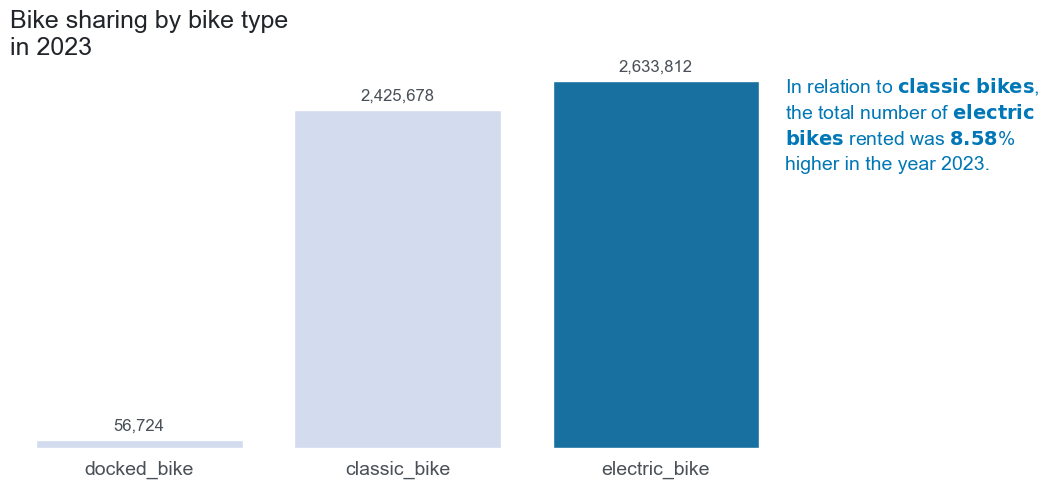

In [46]:
colors = []
for i in df_bike_type.index:
    if df_bike_type.loc[i, 'total'] == df_bike_type.total.max():
        colors.append(AZUL2)
    else:
        colors.append(AZUL5)

ax = plot_col_style(colors)

ax.text(2.5, 2e6,
        'In relation to $\\bf{classic}$ $\\bf{bikes}$,\n'
        'the total number of $\\bf{electric}$ \n'
        '$\\bf{bikes}$ rented was $\\bf{8.58}$%\n'
        'higher in the year 2023.',
        fontsize=14, linespacing=1.45, color=AZUL2)

fig = ax.get_figure()

In [47]:
# Bike sharing by month
df_rides = df.copy()
df_rides = df_rides[['bike_type','user_type', 'month', 'quarter']]
df_rides

,bike_type,user_type,month,quarter
189816,classic_bike,member,January,1
185198,electric_bike,casual,January,1
106410,classic_bike,casual,January,1
169407,electric_bike,member,January,1
18323,classic_bike,member,January,1
...,...,...,...,...
164055,electric_bike,member,December,4
222564,electric_bike,member,December,4
178730,electric_bike,casual,December,4
179852,electric_bike,member,December,4


In [48]:
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df_rides['month'] = pd.Categorical(df_rides['month'], categories=order, ordered=True)

df_rides_month = df_rides.groupby(['month', 'user_type']).size().reset_index(name='no_of_rides')
df_rides_month

,month,user_type,no_of_rides
0,January,casual,36108
1,January,member,138169
2,February,casual,38390
3,February,member,135361
4,March,casual,55651
5,March,member,179801
6,April,casual,126847
7,April,member,251785
8,May,casual,200002
9,May,member,333573


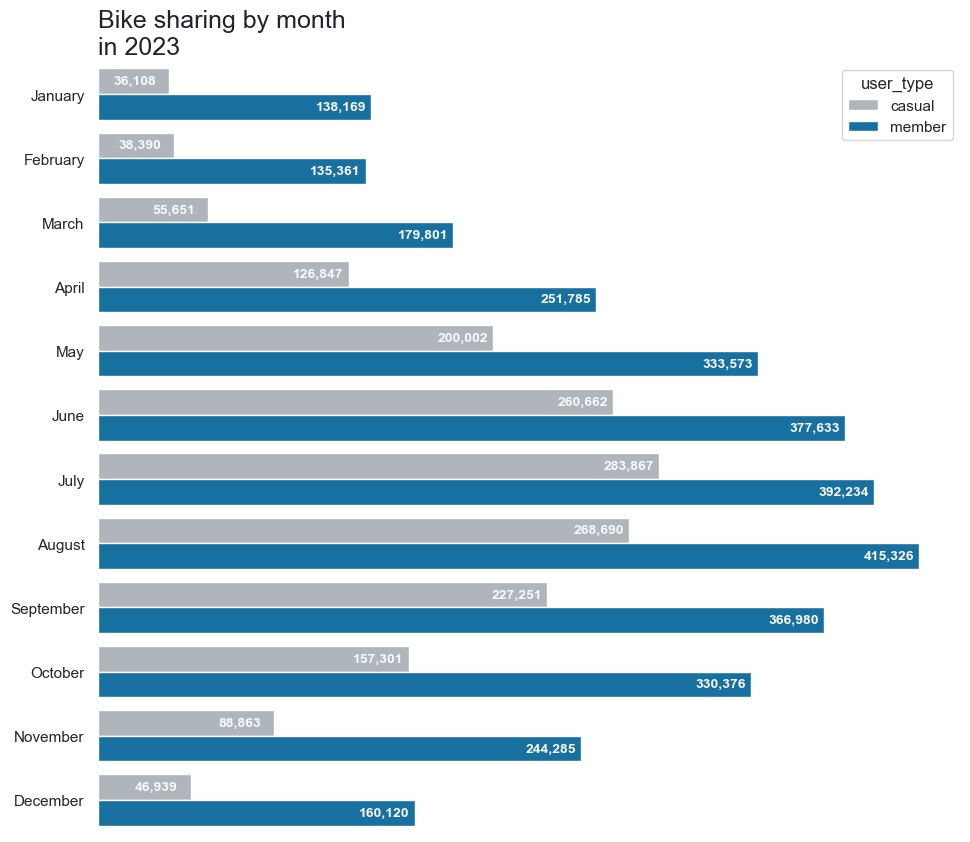

In [49]:
def plot_bar_style():

    fig, ax = plt.subplots(figsize=(15,10))
    fig.subplots_adjust(right=0.7)
    sns.set_theme(style='white')

    colors = [CINZA3, AZUL2]

    ax = sns.barplot(data=df_rides_month, x='no_of_rides', y='month', hue='user_type', palette=colors)

    ax.set_title('Bike sharing by month\nin 2023', loc='left', fontsize=18, color=CINZA1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
    sns.despine(left=True, bottom=True)

    

    ax.set_xticklabels([])
    # for i, valor in enumerate(df_rides_month.no_of_rides):
    #     qtd = f'{valor:,.0f}'
    #     offset = 1e3
    #     ax.text(valor-offset, i, qtd, color=CINZA5, fontsize=10, fontweight='bold', ha='right', va='center')
    #     ax.bar_label(ax.text, padding=3)

    for container in ax.containers:
        labels = [f'{valor.get_width():,.0f}' for valor in container]
        ax.bar_label(container, padding=-40, labels=labels, size=10, color=CINZA5, fontweight='bold')
    return ax

ax = plot_bar_style()


In [50]:
# bike sharing by quarter
df_rides_quarter = df_rides.groupby(['quarter', 'user_type']).size().reset_index(name='no_of_rides')
df_rides_quarter

,quarter,user_type,no_of_rides
0,1,casual,130149
1,1,member,453331
2,2,casual,587511
3,2,member,962991
4,3,casual,779808
5,3,member,1174540
6,4,casual,293103
7,4,member,734781


In [51]:
quarter_tab = pd.crosstab(index=df_rides_quarter.quarter, columns=df_rides_quarter.user_type, values=df_rides_quarter.no_of_rides, aggfunc='sum')
quarter_tab = quarter_tab[['member', 'casual']]
quarter_tab = quarter_tab.rename(index={1: 'Jan - Mar', 
                                        2: 'Apr - Jun',
                                        3: 'Jul - Sep',
                                        4: 'Oct - Dec'})
quarter_tab 

user_type,member,casual
quarter,,
Jan - Mar,453331,130149
Apr - Jun,962991,587511
Jul - Sep,1174540,779808
Oct - Dec,734781,293103


In [52]:
quarter_tab = pd.crosstab(index=df_rides_quarter.quarter, columns=df_rides_quarter.user_type, values=df_rides_quarter.no_of_rides, aggfunc='sum')
quarter_tab = quarter_tab[['member', 'casual']]
quarter_tab = quarter_tab.sort_values('quarter', ascending=False)
quarter_tab = quarter_tab.rename(index={1: 'Jan - Mar', 
                                        2: 'Apr - Jun',
                                        3: 'Jul - Sep',
                                        4: 'Oct - Dec'})
quarter_tab

user_type,member,casual
quarter,,
Oct - Dec,734781,293103
Jul - Sep,1174540,779808
Apr - Jun,962991,587511
Jan - Mar,453331,130149


In [53]:
quarter_tab_norm = pd.crosstab(index=df_rides_quarter.quarter, columns=df_rides_quarter.user_type, values=df_rides_quarter.no_of_rides, aggfunc='sum', normalize='index')
quarter_tab_norm = quarter_tab_norm[['member', 'casual']]
quarter_tab_norm = quarter_tab_norm.sort_values('quarter', ascending=False)
quarter_tab_norm = quarter_tab_norm.rename(index={1: 'Jan - Mar', 
                                        2: 'Apr - Jun',
                                        3: 'Jul - Sep',
                                        4: 'Oct - Dec'})
quarter_tab_norm 

user_type,member,casual
quarter,,
Oct - Dec,0.714848,0.285152
Jul - Sep,0.600988,0.399012
Apr - Jun,0.621083,0.378917
Jan - Mar,0.776944,0.223056


In [54]:
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

C:\Users\akemi\AppData\Local\Temp\ipykernel_19884\2915140569.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels([''])
C:\Users\akemi\AppData\Local\Temp\ipykernel_19884\2915140569.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels([''])


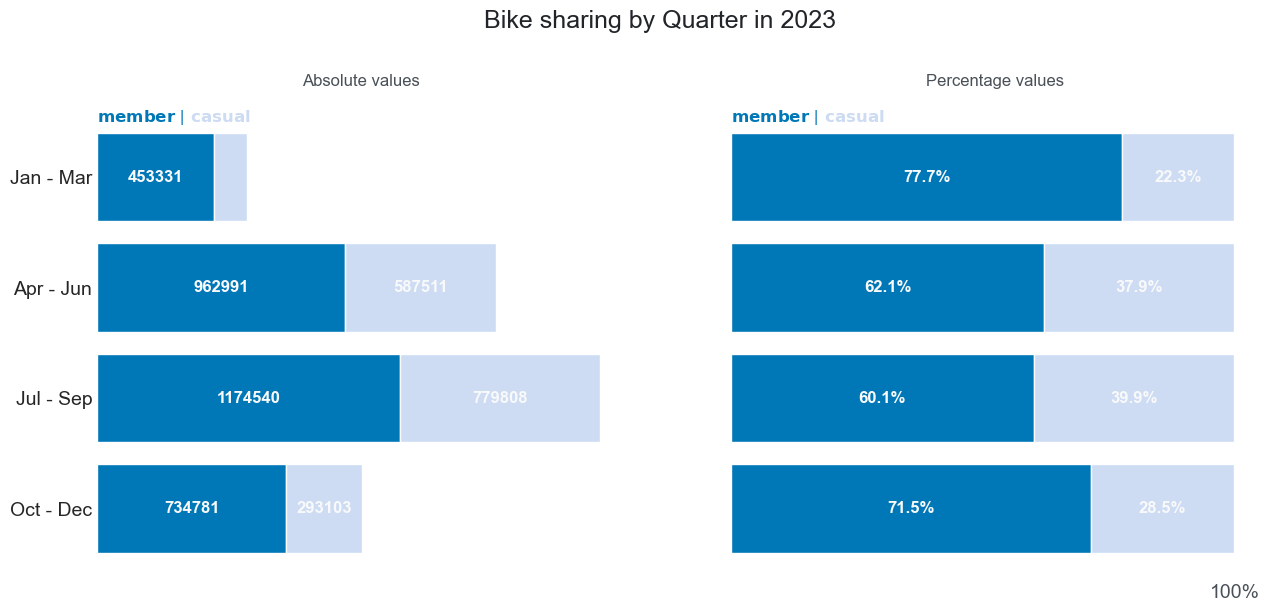

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(15,6), sharey=True)

colors = [AZUL2, AZUL5]

# Plot1

axs[0].barh(quarter_tab.index, quarter_tab.member, color=colors[0])
axs[0].barh(quarter_tab.index, quarter_tab.casual, left=quarter_tab.member, color=colors[1])
axs[0].set_title('Absolute values\n', color=CINZA2)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].set_xticklabels([''])
axs[0].yaxis.set_tick_params(labelsize=14, color=CINZA2)
axs[0].set_frame_on(False)

axs[0].tick_params(axis='both', which='both', length=0)


texto_colorido(0, 3.5, '$\\bf{member}$ | || $\\bf{casual}$', cores=[colors], ax=axs[0], fontsize=12)
#axs[0].invert_yaxis()

#Plot2
axs[1].barh(quarter_tab_norm.index, quarter_tab_norm.member, color=colors[0])
axs[1].barh(quarter_tab_norm.index, quarter_tab_norm.casual, left=quarter_tab_norm.member, color=colors[1])
axs[1].set_title('Percentage values\n', color=CINZA2)
axs[1].set_xlabel('100%', color=CINZA2, size=14, loc='right')
axs[1].set_ylabel('')
axs[1].set_xticklabels([''])
#axs[1].set_tick_params(labelsize=14, color=CINZA2)
axs[1].set_frame_on(False)

axs[1].tick_params(axis='both', which='both', length=0)


texto_colorido(0, 3.5, '$\\bf{member}$ | || $\\bf{casual}$', cores=[colors], ax=axs[1], fontsize=12)

##############

fig.suptitle('Bike sharing by Quarter in 2023\n\n\n', fontsize=18, color=CINZA1, ha='center', x=0.5, y=1.05)

##### values
for container in axs[0].containers:
    labels = [str(valor.get_width()) if valor.get_width() > 150000 else '' for valor in container]
    axs[0].bar_label(container, label_type='center', labels=labels, size=12, color=CINZA5, fontweight='bold')

for container in axs[1].containers:
    labels = [f'{valor.get_width()*100:.1f}%' for valor in container]
    axs[1].bar_label(container, label_type='center', labels=labels, size=12, color=CINZA5, fontweight='bold')

plt.show()

In [56]:
# Bike sharing on weekdays
df_weekday = df.copy()
df_weekday = df_weekday[['user_type', 'day_of_week']]

order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

df_weekday['day_of_week'] = pd.Categorical(df_weekday['day_of_week'], categories=order, ordered=True)
df_weekday= df_weekday.groupby(['day_of_week', 'user_type']).value_counts().reset_index(name='no_of_rides')
df_weekday

,day_of_week,user_type,no_of_rides
0,Sunday,casual,284724
1,Sunday,member,367125
2,Monday,casual,204138
3,Monday,member,452156
4,Tuesday,casual,217079
5,Tuesday,member,525502
6,Wednesday,casual,221186
7,Wednesday,member,536087
8,Thursday,casual,239509
9,Thursday,member,536959


In [57]:
df_weekday = pd.crosstab(index=df_weekday.day_of_week, columns=df_weekday.user_type, values=df_weekday.no_of_rides, aggfunc='sum', normalize='index')
df_weekday = df_weekday[['member','casual']]
df_weekday

user_type,member,casual
day_of_week,,
Sunday,0.563206,0.436794
Monday,0.688953,0.311047
Tuesday,0.707670,0.292330
Wednesday,0.707918,0.292082
Thursday,0.691540,0.308460
Friday,0.639479,0.360521
Saturday,0.547072,0.452928


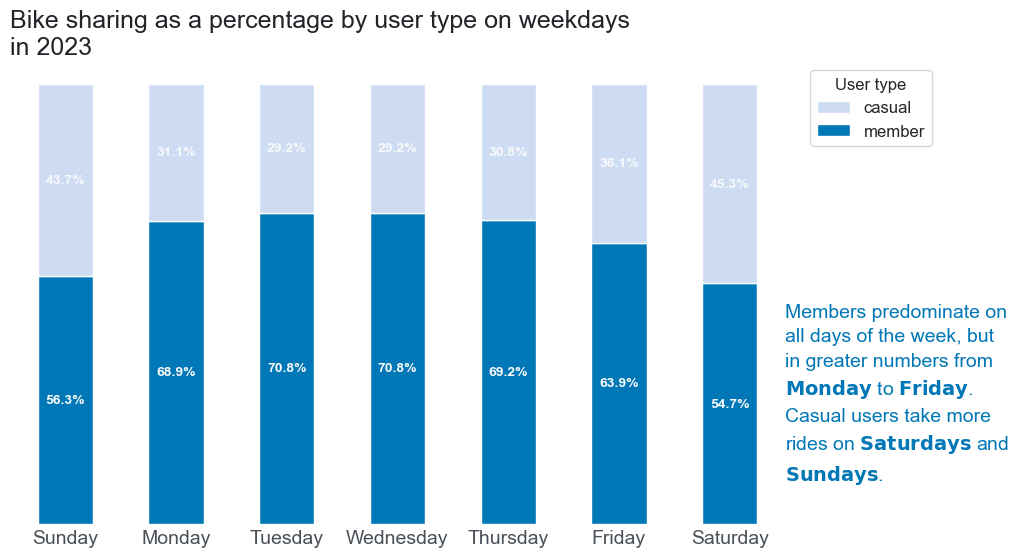

In [58]:
def plot_weekday():

    colors = [AZUL2, AZUL5]

    ax = df_weekday.plot(kind='bar', stacked=True, figsize=(10,6), color=colors)

    ax.set_title('Bike sharing as a percentage by user type on weekdays\nin 2023', loc='left', fontsize=18, color=CINZA1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2, rotation=0)
    sns.despine(left=True, bottom=True)
    ax.set_frame_on(False)

    ax.set_yticklabels([])
    ax.tick_params(axis='both', which='both', length=0)
    
    
    return ax

ax = plot_weekday()

ax.legend(bbox_to_anchor=(1.2,1), reverse=True, title='User type', title_fontsize=12, fontsize=12)
for container in ax.containers:
    #labels = [f'{valor.get_height():,.0f}' for valor in container]
    labels = [f'{valor.get_height()*100:.1f}%' for valor in container]
    
    ax.bar_label(container, label_type='center', labels=labels, size=10, color=CINZA5, fontweight='bold')

ax.text(6.5, 0.1,
        'Members predominate on\n'
        'all days of the week, but \n'
        'in greater numbers from  \n'
        '$\\bf{Monday}$ to $\\bf{Friday}$.\n'
        'Casual users take more \n'
        'rides on $\\bf{Saturdays}$ and\n'
        '$\\bf{Sundays}$.',
        fontsize=14, linespacing=1.45, color=AZUL2)

plt.show()

In [59]:
# Bike sharing by hours
df_hours = df.copy()
df_hours = df[['started_at','user_type']]
df_hours['hours']  = df_hours['started_at'].dt.hour
df_hours.drop(columns='started_at', inplace=True)

df_hours = df_hours.groupby(['hours', 'user_type']).value_counts().reset_index(name='no_of_rides')
df_hours


C:\Users\akemi\AppData\Local\Temp\ipykernel_19884\3155657723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hours['hours']  = df_hours['started_at'].dt.hour
C:\Users\akemi\AppData\Local\Temp\ipykernel_19884\3155657723.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hours.drop(columns='started_at', inplace=True)


,hours,user_type,no_of_rides
0,0,casual,32294
1,0,member,31918
2,1,casual,20864
3,1,member,18984
4,2,casual,12480
5,2,member,10938
6,3,casual,6870
7,3,member,7046
8,4,casual,5148
9,4,member,7681


In [60]:
hours = pd.crosstab(index=df_hours.hours, columns=df_hours.user_type, values=df_hours.no_of_rides, aggfunc='sum')
hours = hours[['member', 'casual']]
hours

user_type,member,casual
hours,,
0,31918,32294
1,18984,20864
2,10938,12480
3,7046,6870
4,7681,5148
5,30971,10345
6,96726,27135
7,177962,48116
8,224646,63921


In [61]:
import plotly.express as px

In [62]:
fig = px.line(hours, x=hours.index, y=hours.columns, markers=True, color_discrete_sequence=[AZUL2, AZUL4], labels={'user_type': 'User Type'})

fig.update_layout(width=1300, height=600, font_size=15, font_color=CINZA2, title_font_color=CINZA1, title_font_size=24, 
                  title_text='Bike sharing by hours by user type',
                  xaxis_title='', yaxis_title='', plot_bgcolor='white')

labels = ['0h', '1h', '2h', '3h', '4h', '5h', '6h', '7h', '8h', '9h', '10h', '11h', '12h', '13h', '14h', '15h', '16h', '17h', '18h', '19h', '20h', '21h', '22h', '23h']
fig.update_xaxes(ticktext=labels, tickvals=hours.index)

fig.update_traces(mode='markers+lines', hovertemplate = '<b>Hours:</b> %{x} <br> <b>Number of rides:</b> %{y}')

fig.show()

In [63]:
# Bike sharing on weekdays and weekends
df_workingday = df.copy()
df_workingday = df_workingday[['day_of_week', 'user_type', 'started_at']]

In [64]:
df_workingday['hours'] = df_workingday['started_at'].dt.hour
df_workingday.head()

,day_of_week,user_type,started_at,hours
189816,Sunday,member,2023-01-01 00:02:06,0
185198,Sunday,casual,2023-01-01 00:03:26,0
106410,Sunday,casual,2023-01-01 00:04:07,0
169407,Sunday,member,2023-01-01 00:04:27,0
18323,Sunday,member,2023-01-01 00:04:54,0


In [65]:
work_weekend = {'Monday': 'working day', 'Tuesday': 'working day', 'Wednesday': 'working day', 'Thursday': 'working day', 'Friday': 'working day', 'Saturday': 'weekend', 'Sunday': 'weekend'}
df_workingday['workingday'] = df['day_of_week'].map(work_weekend)
df_workingday.head()

,day_of_week,user_type,started_at,hours,workingday
189816,Sunday,member,2023-01-01 00:02:06,0,weekend
185198,Sunday,casual,2023-01-01 00:03:26,0,weekend
106410,Sunday,casual,2023-01-01 00:04:07,0,weekend
169407,Sunday,member,2023-01-01 00:04:27,0,weekend
18323,Sunday,member,2023-01-01 00:04:54,0,weekend


In [66]:
df_workingday.drop(columns=['day_of_week', 'started_at'], inplace=True)
df_workingday.head()

,user_type,hours,workingday
189816,member,0,weekend
185198,casual,0,weekend
106410,casual,0,weekend
169407,member,0,weekend
18323,member,0,weekend


In [67]:
df_workingday = df_workingday.groupby(['user_type', 'workingday']).value_counts().reset_index(name='no_of_rides')
df_workingday.head()

,user_type,workingday,hours,no_of_rides
0,casual,weekend,15,54739
1,casual,weekend,14,53650
2,casual,weekend,13,52569
3,casual,weekend,16,52270
4,casual,weekend,12,50013


In [68]:
workingday = pd.crosstab(index=df_workingday.hours, columns=df_workingday.workingday, values=df_workingday.no_of_rides, aggfunc='sum')
workingday = workingday[['working day', 'weekend']]
workingday

workingday,working day,weekend
hours,,
0,29029,35183
1,15427,24421
2,8916,14502
3,6231,7685
4,8188,4641
5,35395,5921
6,111000,12861
7,203747,22331
8,249001,39566


In [69]:
fig = px.line(workingday, x=workingday.index, y=workingday.columns, markers=True, color_discrete_sequence=[AZUL2, AZUL4], labels={'workingday': 'Working day / Weekend'})

fig.update_layout(width=1300, height=600, font_size=15, font_color=CINZA2, title_font_color=CINZA1, title_font_size=24, 
                  title_text='Bike sharing by hours on working day and weekend',
                  xaxis_title='', yaxis_title='', plot_bgcolor='white')

labels = ['0h', '1h', '2h', '3h', '4h', '5h', '6h', '7h', '8h', '9h', '10h', '11h', '12h', '13h', '14h', '15h', '16h', '17h', '18h', '19h', '20h', '21h', '22h', '23h']
fig.update_xaxes(ticktext=labels, tickvals=hours.index)

fig.update_traces(mode='markers+lines', hovertemplate = '<b>Hours:</b> %{x} <br> <b>Number of rides:</b> %{y}')

fig.show()

In [70]:
# Distance traveled
df_ride = df.copy()
df_ride = df_ride[['user_type', 'ride_length', 'ride_km']]
df_ride.head()

,user_type,ride_length,ride_km
189816,member,28.0,0.196938
185198,casual,4.0,0.011641
106410,casual,10.0,2.085631
169407,member,12.0,0.013570
18323,member,27.0,1.902484


In [71]:
df_ride_member = df_ride.query('user_type == "member"')
df_ride_casual = df_ride.query('user_type == "casual"')



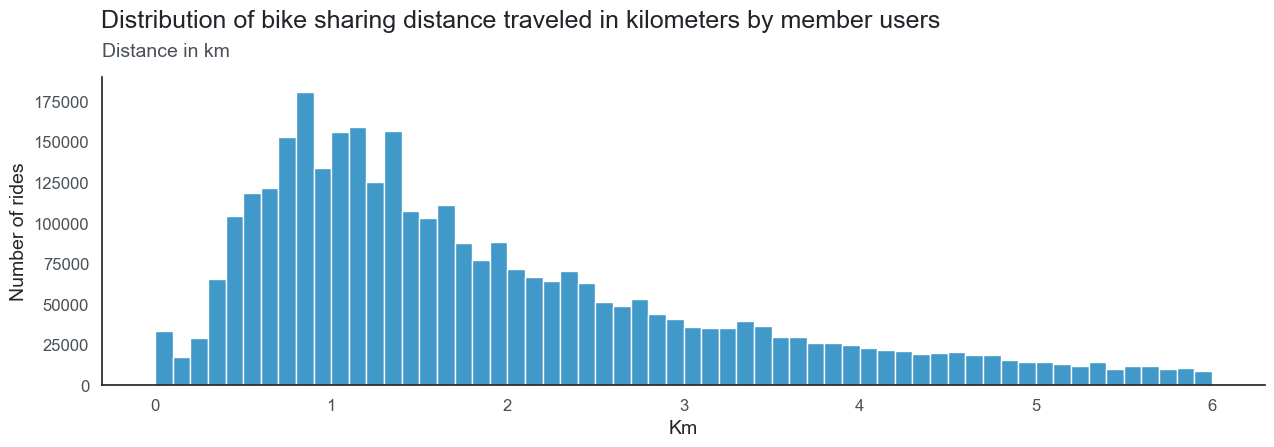

In [72]:
fig, ax = plt.subplots(figsize=(15,4))
sns.set_theme(style='white')

ax = sns.histplot(data=df_ride_member, x='ride_km', binwidth=0.1, color=AZUL2)

plt.suptitle('Distribution of bike sharing distance traveled in kilometers by member users', size=18, color=CINZA1, ha='right', x=0.684, y=1.05)
plt.title('Distance in km', fontsize=14, color=CINZA2, pad=15, loc='left')
ax.set_xlabel('Km', fontsize=14)
ax.set_ylabel('Number of rides', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
# ax.set_xlim(df_ride_member.ride_km.min(), df_ride_member.ride_km.max())
sns.despine()

# ax.set_ylabel('')
# ax.set_yticklabels([''])

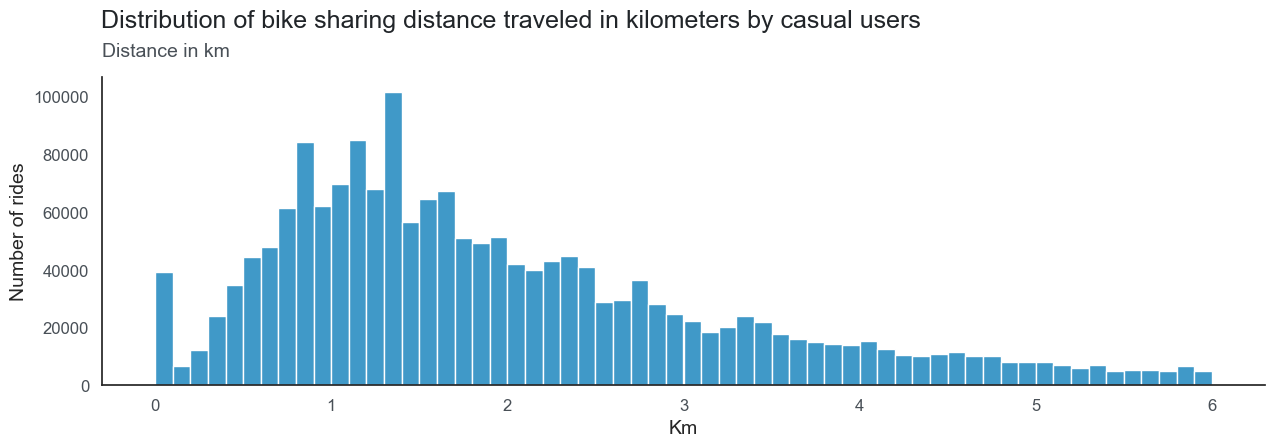

In [73]:
fig, ax = plt.subplots(figsize=(15,4))
sns.set_theme(style='white')

ax = sns.histplot(data=df_ride_casual, x='ride_km', binwidth=0.1, color=AZUL2)

plt.suptitle('Distribution of bike sharing distance traveled in kilometers by casual users', size=18, color=CINZA1, ha='right', x=0.671, y=1.05)
plt.title('Distance in km', fontsize=14, color=CINZA2, pad=15, loc='left')
ax.set_xlabel('Km', fontsize=14)
ax.set_ylabel('Number of rides', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
# ax.set_xlim(df_ride_member.ride_km.min(), df_ride_member.ride_km.max())
sns.despine()

# ax.set_ylabel('')
# ax.set_yticklabels([''])

In [74]:
# average bike sharing time
df_ride = df.copy()
df_ride = df_ride[['day_of_week','user_type', 'ride_length', 'ride_km']]
df_ride.head()

,day_of_week,user_type,ride_length,ride_km
189816,Sunday,member,28.0,0.196938
185198,Sunday,casual,4.0,0.011641
106410,Sunday,casual,10.0,2.085631
169407,Sunday,member,12.0,0.013570
18323,Sunday,member,27.0,1.902484


In [75]:
df_length = df_ride.groupby(['day_of_week', 'user_type']).ride_length.mean().reset_index(name='average_time')
df_length

,day_of_week,user_type,average_time
0,Sunday,casual,21.088619
1,Sunday,member,12.248261
2,Monday,casual,17.704582
3,Monday,member,10.525754
4,Tuesday,casual,16.347169
5,Tuesday,member,10.572260
6,Wednesday,casual,15.759198
7,Wednesday,member,10.594493
8,Thursday,casual,15.881762
9,Thursday,member,10.649541


C:\Users\akemi\AppData\Local\Temp\ipykernel_19884\3030613954.py:19: UserWarning:

FixedFormatter should only be used together with FixedLocator



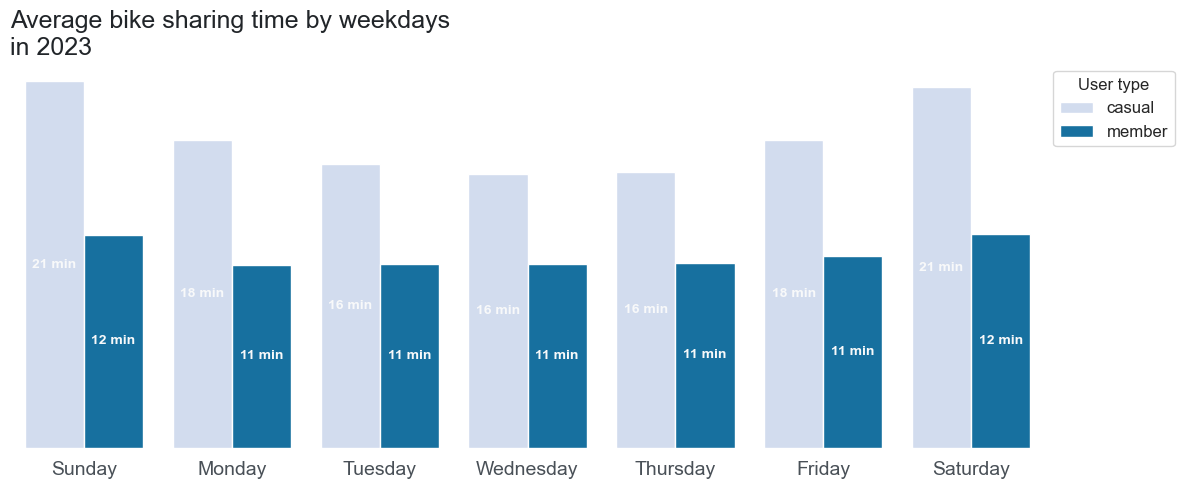

In [76]:
def plot_bar_style():

    fig, ax = plt.subplots(figsize=(18,5))
    fig.subplots_adjust(right=0.7)
    sns.set_theme(style='white')

    colors = [AZUL5, AZUL2]

    ax = sns.barplot(data=df_length, y='average_time', x='day_of_week', hue='user_type', palette=colors)

    ax.set_title('Average bike sharing time by weekdays\nin 2023', loc='left', fontsize=18, color=CINZA1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
    sns.despine(left=True, bottom=True)

    ax.legend(bbox_to_anchor=(1,1),  title='User type', title_fontsize=12, fontsize=12)

    ax.set_yticklabels([''])
    # for i, valor in enumerate(df_rides_month.no_of_rides):
    #     qtd = f'{valor:,.0f}'
    #     offset = 1e3
    #     ax.text(valor-offset, i, qtd, color=CINZA5, fontsize=10, fontweight='bold', ha='right', va='center')
    #     ax.bar_label(ax.text, padding=3)

    for container in ax.containers:
        labels = [f'{valor.get_height():,.0f} min' for valor in container]
        ax.bar_label(container, label_type='center', labels=labels, size=10, color=CINZA5, fontweight='bold')
    return ax

ax = plot_bar_style()

## Summary

* 64% of Cyclistic customers are members and 36% are casual users.
* The most used stations are: 
    * Streeter Dr & Grand Ave
    * DuSable Lake Shore Dr & Monroe St
    * Michigan Ave & Oak St 
    * DuSable Lake Shore Dr & North Blvd 
    * Clark St & Elm St
* In relation to classic bikes, the total number of electric bikes rented was 8.58% higher in the year 2023.
* The months when members used the shared bikes the most were August, followed by July and September. For casual users, the most used month was July, followed by August and June, which coincides with summer. The least used months for both members and casual users were December, January, and February.
* The best quarter for bike sharing is from July to September, where approximately 60% of users are members and 40% are casual users.
* Members predominate on all days of the week, but in greater numbers from Monday to Friday. Casual users take more rides on Saturdays and Sundays.
* The times most used by members in the morning are from 7 am to 9 am and in the late afternoon from 4 pm to 6 pm, indicating that member users use bike sharing to commute to and from work. Casual users tend to use bike sharing from 6 am to 5 pm, in a linearly increasing manner.
* On weekdays, the peaks in bike sharing occur at 8 am and 5 pm, reinforcing the idea that users use bike sharing to commute to and from work. On weekends, users start using bike sharing from 6 am until 12 pm, where it remains constant until 3 pm, then gradually decreases until 11 pm.
* The distance traveled for both members and casual users is concentrated at approximately 1 km.
* On weekdays, members use bike sharing for approximately 11 minutes, and casual users use bike sharing for approximately 20 minutes on weekends. Casual users tend to use bike sharing for longer periods than members.